In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

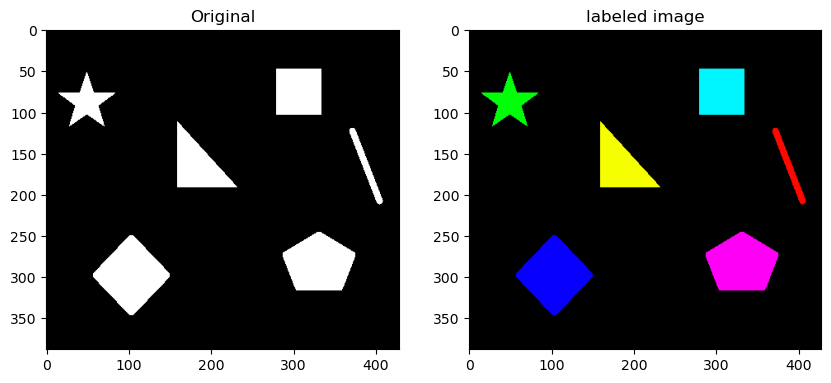

In [3]:

img = cv2.imread("../data/images/shapes.png", 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(img) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");